In [53]:
import os
from pathlib import Path

import folium
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from scipy.stats import linregress, spearmanr

from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service as FirefoxService
from webdriver_manager.firefox import GeckoDriverManager

import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
pd.options.display.float_format = '{:,.5f}'.format


In [54]:

ontario_map = folium.Map(
    location=[44.0, -79.0], 
    zoom_start=7, 
    tiles='CartoDB Positron No Labels',
    attr="Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL."
)

cities = [
    ("Chatham-Kent", 42.4048, -82.191),
    ("Cornwall", 45.0213, -74.7308),
    ("Durham", 44.0065, -78.8914),
    ("Kingston", 44.2312, -76.486),
    ("London", 42.9849, -81.2453),
    ("Northumberland", 44.0194, -77.9584),
    ("Ottawa", 45.4215, -75.6972),
    ("Peterborough", 44.3091, -78.3197),
    ("Simcoe", 42.8336, -80.3047),
    ("York", 43.6532, -79.3832)
]

label_offsets = {
    "Chatham-Kent": {"horizontal": 145, "vertical": 33},
    "Cornwall": {"horizontal": 23, "vertical": 45},
    "Durham": {"horizontal": 120, "vertical": 28},
    "Kingston": {"horizontal": 23, "vertical": 45},
    "London": {"horizontal": 70, "vertical": 1},
    "Northumberland": {"horizontal": 73, "vertical": 1},
    "Ottawa": {"horizontal": 21, "vertical": 45},
    "Peterborough": {"horizontal": 87, "vertical": 50},
    "Simcoe": {"horizontal": 50, "vertical": 45},
    "York": {"horizontal": 70, "vertical": 10}
}

for city, lat, lon in cities:
    feature_group = folium.FeatureGroup(name=city).add_to(ontario_map)

    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='rgb(21, 96, 130)',
        fill=True,
        fill_color='rgb(21, 96, 130)',
        fill_opacity=1.0
    ).add_to(feature_group)

    horizontal_offset = label_offsets[city]["horizontal"]
    vertical_offset = label_offsets[city]["vertical"]

    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(horizontal_offset, vertical_offset),
            html=f'<div style="font-size: 22pt; color: rgb(96, 113, 119); font-weight: bold; font-family: sans-serif;">{city}</div>'
        )
    ).add_to(feature_group)
ontario_map


In [55]:
ontario_map.save("ontario_cities_map.html")


In [56]:
html_path = "E:/Sem 4/code/ontario_cities_map.html"

options = Options()
options.add_argument("--headless")

service = FirefoxService(executable_path=GeckoDriverManager().install())
driver = webdriver.Firefox(service=service, options=options)

driver.get(f"file:///{html_path}")

driver.set_window_size(1400, 800)

driver.save_screenshot("full_map.png")

img = Image.open("full_map.png")

left = 200 
top = 50   
right = 1200
bottom = 650

cropped_img = img.crop((left, top, right, bottom))

cropped_img.save("cropped_ontario_map.png")

driver.quit()

print("Screenshot taken and cropped map saved as 'cropped_ontario_map.png'.")


Screenshot taken and cropped map saved as 'cropped_ontario_map.png'.


In [57]:
directory = r"E:\Sem 4\csv_data"

# Read each CSV file into a separate DataFrame
housing_data_page_1 = pd.read_csv(f"{directory}\\housing_data_page_1.csv")
housing_data_page_3 = pd.read_csv(f"{directory}\\housing_data_page_3.csv")
housing_data_page_4 = pd.read_csv(f"{directory}\\housing_data_page_4.csv")
housing_data_page_4_part1 = pd.read_csv(f"{directory}\\housing_data_page_4_part1.csv")
housing_data_page_5 = pd.read_csv(f"{directory}\\housing_data_page_5.csv")
housing_data_page_7 = pd.read_csv(f"{directory}\\housing_data_page_7.csv")
SHRRP = pd.read_csv(f"{directory}\\SHRRP.csv")
CWL = pd.read_csv(f"{directory}\\CWL.csv")


## Page3

In [58]:
housing_data_page_3['Name'].unique()

array(['Public housing', 'Rent supplement', 'Limited dividend',
       'Section 26', 'Section 27', 'Section 95 - PNP', 'Section 95 - MNP',
       'Provincial reformed', 'Post 85 urban native',
       'Pre-86 urban native', 'TOTAL'], dtype=object)

In [59]:
housing_data_page_3.describe()

,Year,Number,One Time Funding,Ongoing Funding,Total,Percentage
count,"1,188.00000","1,188.00000","1,188.00000","1,188.00000","1,188.00000","1,188.00000"
mean,"2,016.36111",416.17340,"172,558.95850","4,982,041.49917","5,162,640.14980",30.85319
std,3.33323,7.67244,"590,321.55079","12,576,628.06916","12,996,933.76299",40.08293
min,"2,010.00000",188.00000,0.00000,"-8,224.00000","-8,224.00000",0.00000
25%,"2,013.75000",413.00000,0.00000,0.00000,0.00000,0.00000
50%,"2,016.50000",416.00000,0.00000,"25,475.66500","34,055.00000",0.00000
75%,"2,019.00000",419.00000,0.00000,"3,284,446.25000","3,312,668.75000",74.54750
max,"2,023.00000",425.00000,"4,391,395.29000","102,981,191.15000","105,225,876.20000",100.00000


In [60]:
housing_data_page_3['Year'] = housing_data_page_3['Year'].astype(int)
housing_data_page_3['Number'] = housing_data_page_3['Number'].astype(int)

housing_data_page_3 = housing_data_page_3[(housing_data_page_3['Year'] >= 2011) & (housing_data_page_3['Year'] <= 2021)]

housing_data_page_3.head()


,Year,City,Name,Number,One Time Funding,Ongoing Funding,Total,Percentage
0,2011,Chatham-Kent,Public housing,411,"453,810.00000","3,830,940.00000","4,284,750.00000",90.69000
1,2011,Chatham-Kent,Rent supplement,412,"35,678.00000","502,974.00000","538,652.00000",100.00000
2,2011,Chatham-Kent,Limited dividend,413,0.00000,0.00000,0.00000,0.00000
3,2011,Chatham-Kent,Section 26,414,0.00000,0.00000,0.00000,0.00000
4,2011,Chatham-Kent,Section 27,415,0.00000,0.00000,0.00000,0.00000


In [61]:

box_city = housing_data_page_3.groupby(['Year', 'City'])['Ongoing Funding'].sum().reset_index()

box_city.head()


,Year,City,Ongoing Funding
0,2011,Chatham-Kent,"17,841,492.00000"
1,2011,Cornwall,"14,741,356.00000"
2,2011,Kingston,"23,037,220.00000"
3,2011,London,"60,111,318.00000"
4,2011,Northumberland,"11,971,088.18000"


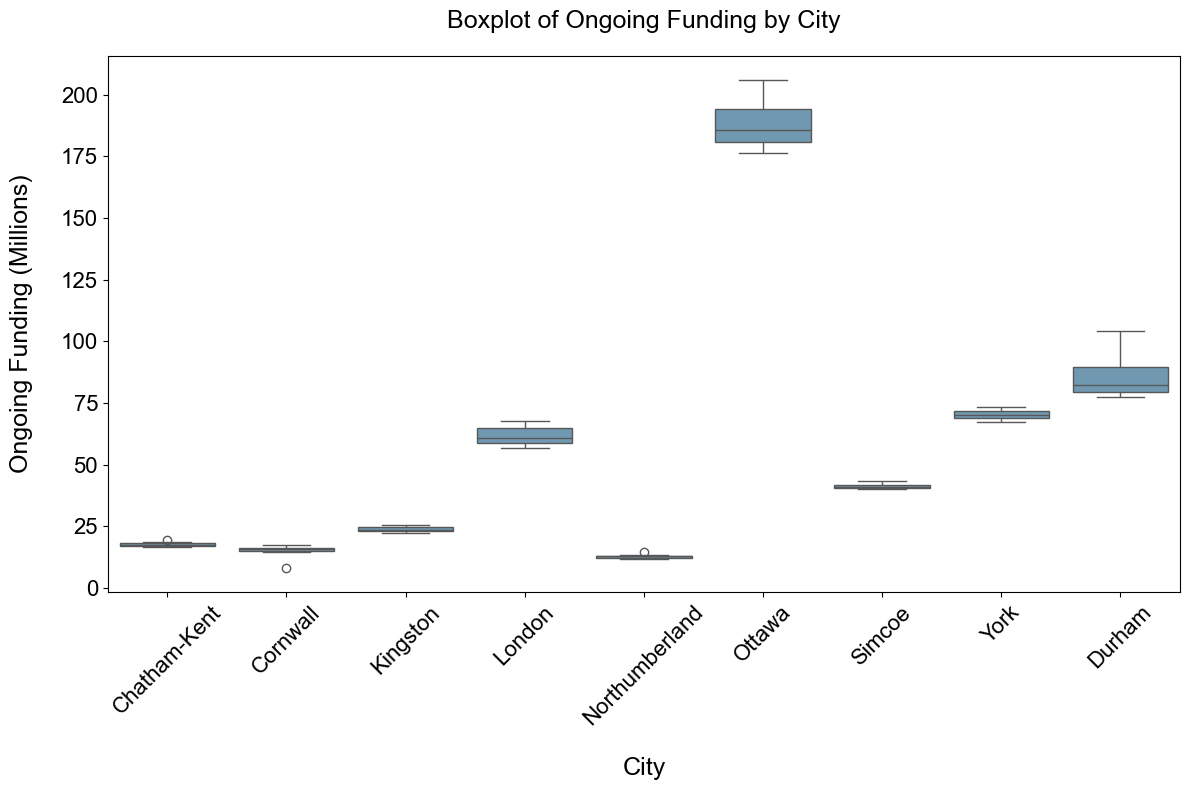

In [62]:

box_city_filtered = box_city[box_city['City'] != 'Peterborough']

plt.figure(figsize=(12, 8))

sns.boxplot(data=box_city_filtered, x='City', y='Ongoing Funding', color='#669bbc')

plt.title('Boxplot of Ongoing Funding by City', fontsize=18, pad=20)
plt.xlabel('City', fontsize=18, labelpad=20)
plt.ylabel('Ongoing Funding (Millions)', fontsize=18, labelpad=20)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

plt.grid(False)
plt.gca().set_facecolor('white')

formatter = FuncFormatter(lambda x, pos: f'{int(x / 1e6)}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

plt.show()


In [63]:
total_ongoing = housing_data_page_3.groupby('Year')['Ongoing Funding'].sum().reset_index()

total_ongoing = total_ongoing.rename(columns={'Ongoing Funding': 'Ongoing'})

total_ongoing

,Year,Ongoing
0,2011,"428,166,765.05000"
1,2012,"511,153,929.44000"
2,2013,"508,730,138.88000"
3,2014,"523,377,347.16000"
4,2015,"503,493,134.24000"
5,2016,"503,671,620.24000"
6,2017,"530,791,221.00000"
7,2018,"540,817,918.00000"
8,2019,"543,647,392.00000"
9,2020,"548,660,729.00000"


C:\Users\combax\AppData\Local\Temp\ipykernel_11220\4047837295.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(i / 1_000_000)}' for i in ax.get_yticks()])


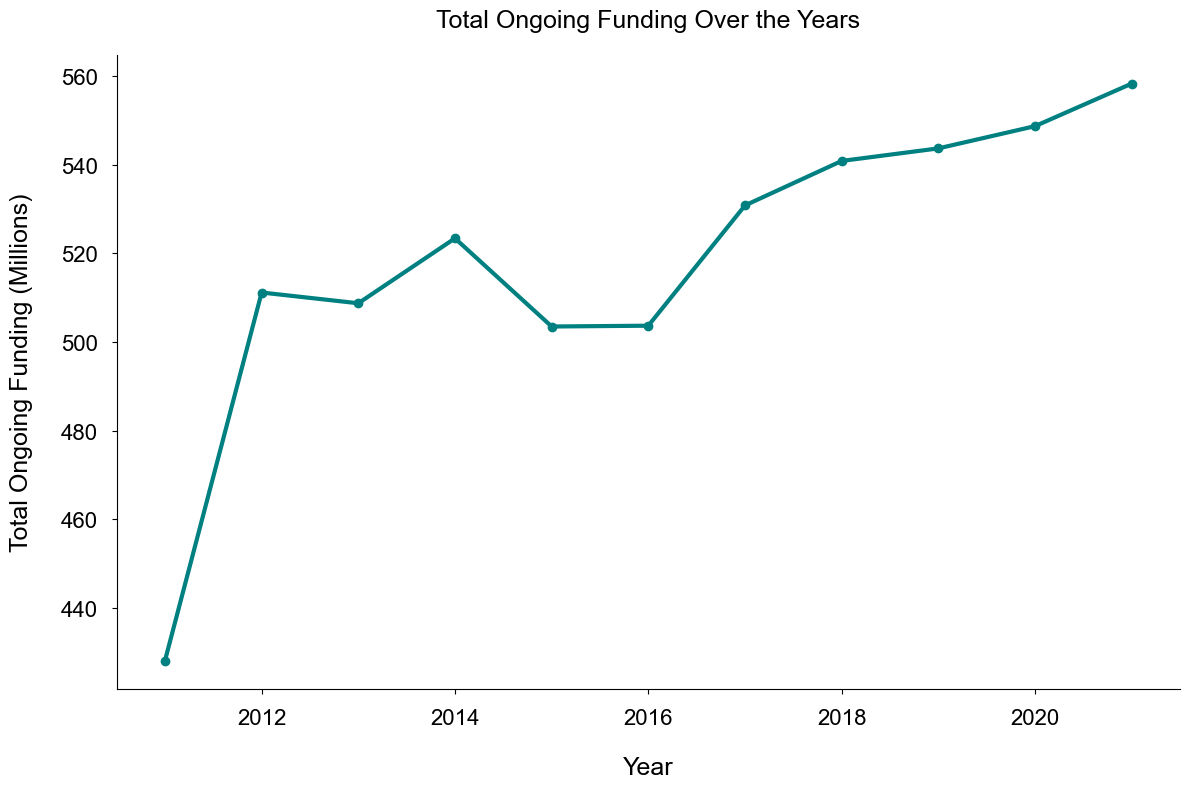

In [64]:

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

# Set up the line plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the 'Ongoing' values with 'Year' on the x-axis
ax.plot(total_ongoing['Year'], total_ongoing['Ongoing'], marker='o', color='teal', linestyle='-', linewidth=3)

# Customize the plot
plt.title('Total Ongoing Funding Over the Years', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=18, labelpad=20)
plt.ylabel('Total Ongoing Funding (Millions)', fontsize=18, labelpad=20)

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set x and y axis ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Update Y-axis labels: divide the current labels by 1,000,000 to represent millions
ax.set_yticklabels([f'{int(i / 1_000_000)}' for i in ax.get_yticks()])

# Remove gridlines
ax.grid(False)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick padding for better spacing
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


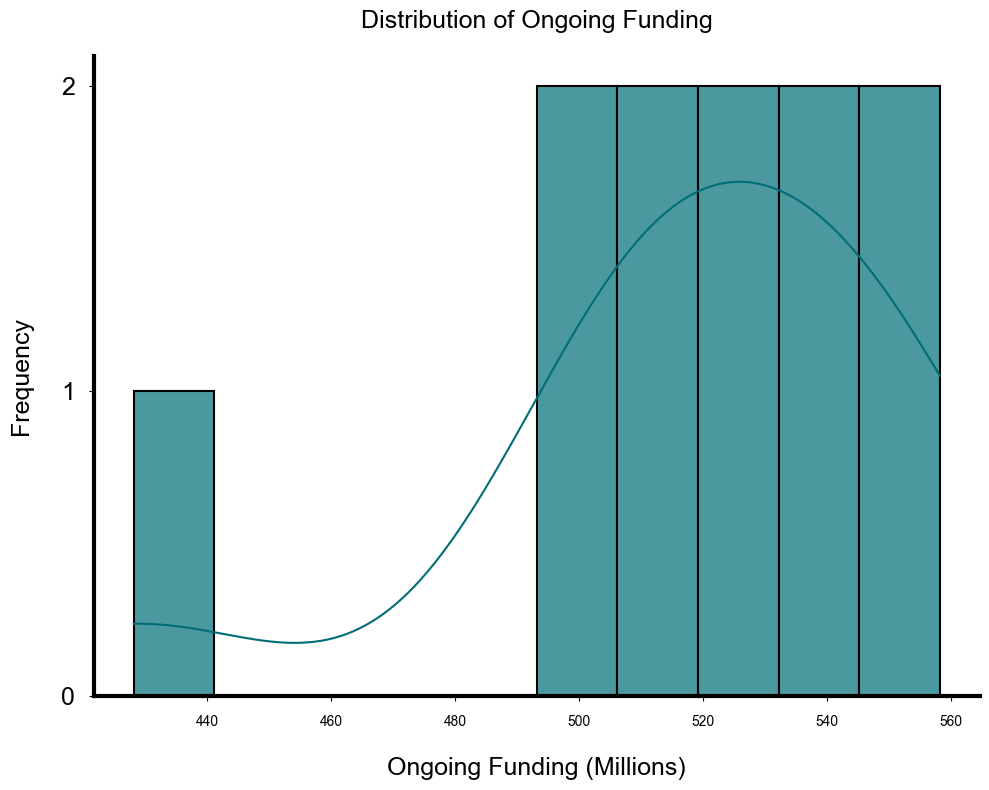

In [65]:

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

housing_data_filtered = housing_data_page_3[
    housing_data_page_3['Year'].between(2011, 2021)
]

yearly_total_funding = housing_data_filtered.groupby('Year')['Ongoing Funding'].sum().reset_index()

yearly_total_funding['Ongoing Funding (Millions)'] = yearly_total_funding['Ongoing Funding'] / 1_000_000

fig, ax = plt.subplots(figsize=(10, 8))

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

sns.histplot(
    yearly_total_funding['Ongoing Funding (Millions)'], 
    bins=10, 
    color='#006d77', 
    edgecolor='black', 
    linewidth=1.5, 
    kde=True,
    alpha=0.7,
    ax=ax
)

plt.title('Distribution of Ongoing Funding', fontsize=18, pad=20)
plt.xlabel('Ongoing Funding (Millions)', fontsize=18, labelpad=20)
plt.ylabel('Frequency', fontsize=18, labelpad=20)

plt.yticks([0, 1, 2], fontsize=18)
ax.grid(False)

for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(spine in ['bottom', 'left'])
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(3)

ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)

plt.tight_layout()

plt.show()


In [66]:

funding_type_mapping = {
    'Public housing': 'Public',
    'Section 95 - MNP': 'Public',
    'Provincial reformed': 'Public',
    'Pre-86 urban native': 'Public',
    'Post 85 urban native': 'Public',
    'Rent supplement': 'Private',
    'Limited dividend': 'Private',
    'Section 26': 'Private',
    'Section 27': 'Private',
    'Section 95 - PNP': 'Private'
}

housing_data_page_3['Funding Type'] = housing_data_page_3['Name'].map(funding_type_mapping)

housing_data_page_3['RGI Funds'] = housing_data_page_3['Ongoing Funding'] * (housing_data_page_3['Percentage'] / 100)
housing_data_page_3['Non-RGI Funds'] = housing_data_page_3['Ongoing Funding'] - housing_data_page_3['RGI Funds']

housing_data_page_3.head()

,Year,City,Name,Number,One Time Funding,Ongoing Funding,Total,Percentage,Funding Type,RGI Funds,Non-RGI Funds
0,2011,Chatham-Kent,Public housing,411,"453,810.00000","3,830,940.00000","4,284,750.00000",90.69000,Public,"3,474,279.48600","356,660.51400"
1,2011,Chatham-Kent,Rent supplement,412,"35,678.00000","502,974.00000","538,652.00000",100.00000,Private,"502,974.00000",0.00000
2,2011,Chatham-Kent,Limited dividend,413,0.00000,0.00000,0.00000,0.00000,Private,0.00000,0.00000
3,2011,Chatham-Kent,Section 26,414,0.00000,0.00000,0.00000,0.00000,Private,0.00000,0.00000
4,2011,Chatham-Kent,Section 27,415,0.00000,0.00000,0.00000,0.00000,Private,0.00000,0.00000


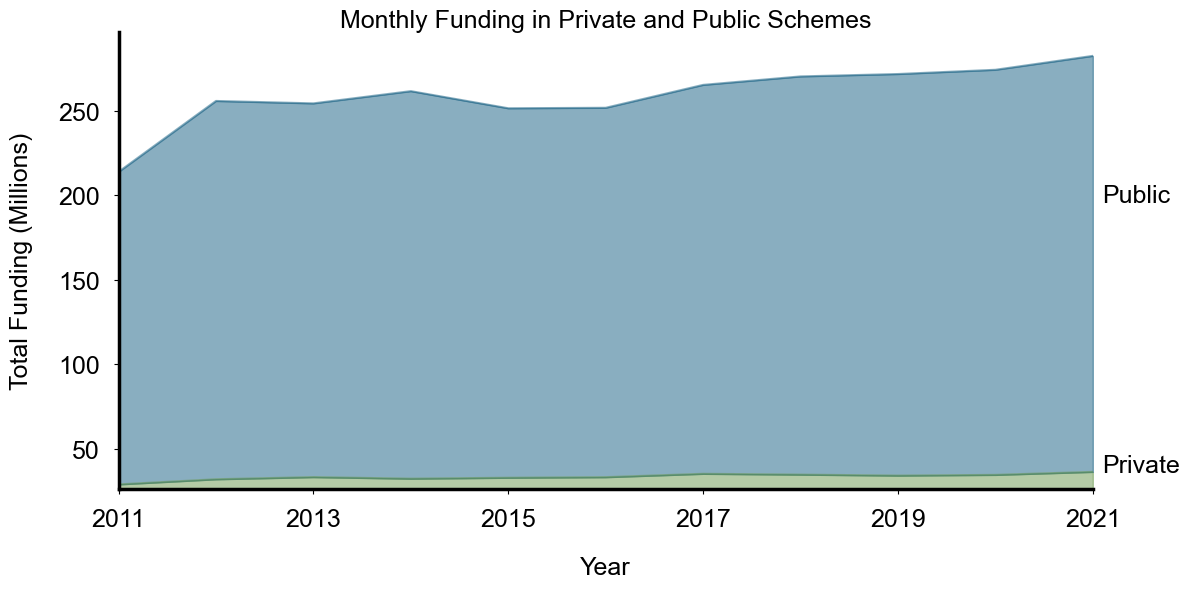

In [67]:

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

housing_data_filtered = housing_data_page_3[
    housing_data_page_3['Year'].between(2011, 2021)
]

funding_by_type = housing_data_filtered.groupby(['Year', 'Funding Type'])['Ongoing Funding'].sum().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size for poster

funding_by_type.plot(kind='area', ax=ax, alpha=0.5, color=['#6a994e', '#155f82'], legend=False)

plt.xlabel('Year', fontsize=18, labelpad=18, verticalalignment='top')
plt.ylabel('Total Funding (Millions)', fontsize=18, labelpad=18, horizontalalignment='center')
plt.title('Monthly Funding in Private and Public Schemes', fontsize=18, pad=0)

# Set x-ticks to display years from 2011 to 2021 with more spacing
plt.xticks(ticks=[2011, 2013, 2015, 2017, 2019, 2021],
           labels=[2011, 2013, 2015, 2017, 2019, 2021],
           fontsize=18)

plt.xlim(2011, 2021)

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'  # Format in millions without appending "M"

ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))
plt.yticks(fontsize=18)

ax.grid(False)

for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(spine in ['bottom', 'left'])
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(2.5)

ax.set_ylim(bottom=funding_by_type.values.min() * 0.9)

ax.text(2021.1, 200000000, "Public", fontsize=18, ha='left', va='center', color='black')  # Adjust Y value
ax.text(2021.1, 40000000, "Private", fontsize=18, ha='left', va='center', color='black')  # Adjust Y value

ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)

plt.tight_layout()

plt.show()


In [68]:
box_city_rgi = housing_data_page_3.groupby(['Year', 'City'])['RGI Funds'].sum().reset_index()

box_city_rgi.head()


,Year,City,RGI Funds
0,2011,Chatham-Kent,"7,498,229.24760"
1,2011,Cornwall,"6,558,567.23580"
2,2011,Kingston,"10,363,844.58790"
3,2011,London,"25,181,137.20650"
4,2011,Northumberland,"5,128,683.07344"


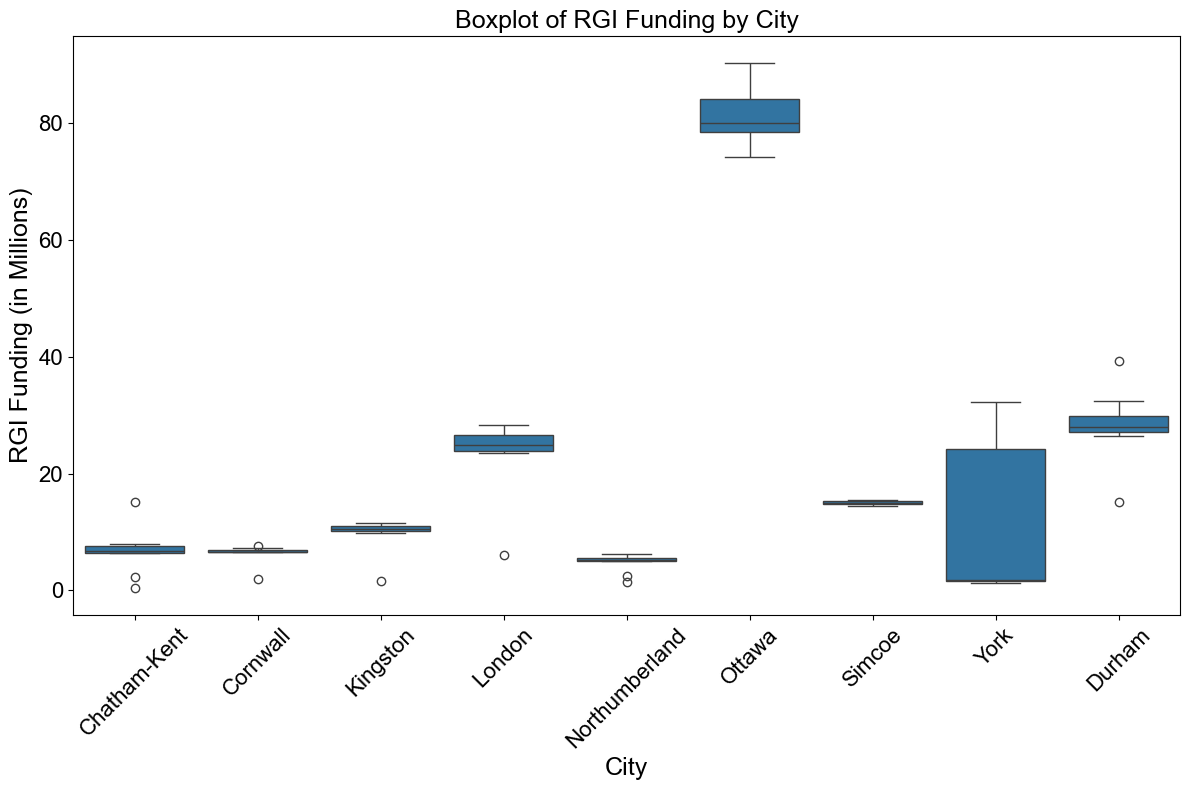

In [69]:
box_city_rgi_excluded = box_city_rgi[box_city_rgi['City'] != 'Peterborough']
plt.figure(figsize=(12, 8))

sns.boxplot(data=box_city_rgi_excluded, x='City', y='RGI Funds')

plt.title('Boxplot of RGI Funding by City', fontsize=18)
plt.xlabel('City', fontsize=18)
plt.ylabel('RGI Funding (in Millions)', fontsize=18)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

plt.grid(False)
plt.gca().set_facecolor('white')

formatter = FuncFormatter(lambda x, pos: f'{int(x / 1e6)}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

plt.show()


In [70]:
filtered_data = housing_data_page_3

filtered_data['RGI'] = filtered_data['Ongoing Funding'] * (filtered_data['Percentage'] / 100)

filtered_data['Non RGI'] = filtered_data['Ongoing Funding'] - filtered_data['RGI']

new_df = filtered_data[['Year', 'RGI', 'Non RGI']]

rgi_non_rgi_df = new_df.groupby('Year').sum().reset_index()

rgi_non_rgi_df

,Year,RGI,Non RGI
0,2011,"176,237,897.25213","251,928,867.79787"
1,2012,"205,185,497.75385","305,968,431.68615"
2,2013,"204,642,303.34520","304,087,835.53480"
3,2014,"188,910,784.77997","334,466,562.38003"
4,2015,"188,632,080.54046","314,861,053.69954"
5,2016,"179,229,535.87583","324,442,084.36417"
6,2017,"187,315,634.92300","343,475,586.07700"
7,2018,"196,417,499.29100","344,400,418.70900"
8,2019,"188,166,979.42900","355,480,412.57100"
9,2020,"132,067,922.13300","416,592,806.86700"


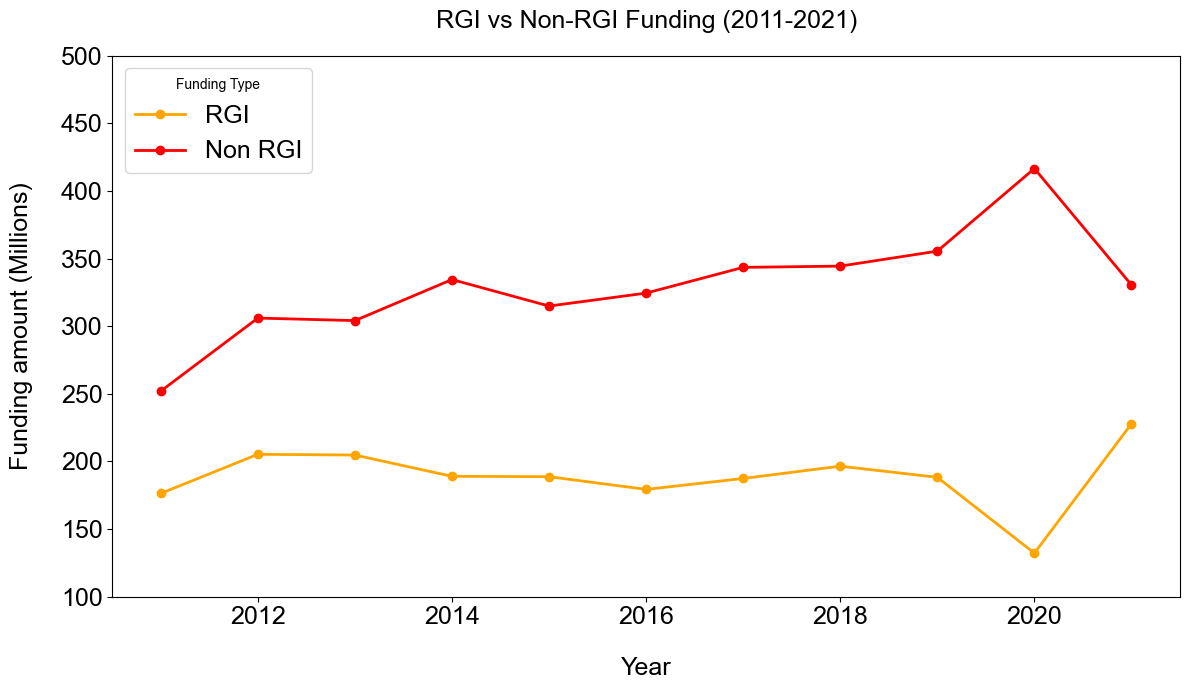

In [71]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Update matplotlib rcParams for fonts
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

# Create the plot
plt.figure(figsize=(12, 7))

# Plot RGI and Non-RGI funding data
plt.plot(rgi_non_rgi_df['Year'], rgi_non_rgi_df['RGI'], label='RGI', color='orange', marker='o', linestyle='-', linewidth=2)
plt.plot(rgi_non_rgi_df['Year'], rgi_non_rgi_df['Non RGI'], label='Non RGI', color='red', marker='o', linestyle='-', linewidth=2)

# Title and labels
plt.title('RGI vs Non-RGI Funding (2011-2021)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=18, labelpad=20, verticalalignment='top')
plt.ylabel('Funding amount (Millions)', fontsize=18, labelpad=20, horizontalalignment='center')

# Set figure background color to white
fig = plt.gcf()  # Get current figure
fig.patch.set_facecolor('white')
plt.gca().set_facecolor('white')

# Set font size for tick labels
plt.xticks(fontsize=18)
yticks = [100, 150, 200, 250, 300, 350, 400, 450, 500]  # These are in millions
yticks_values = [tick * 1e6 for tick in yticks]  # Convert to actual values (in millions)

plt.yticks(yticks_values, yticks, fontsize=18)

# Set y-axis limits for actual values (in millions)
plt.ylim(100 * 1e6, 500 * 1e6)

# Function to format y-axis ticks as millions
def millions_formatter(x, pos):
    return f'{int(x / 1e6)}'  # Convert back to millions for display

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))

# Disable gridlines
plt.grid(False)

# Legend
plt.legend(title='Funding Type', fontsize=18)

# Adjust layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


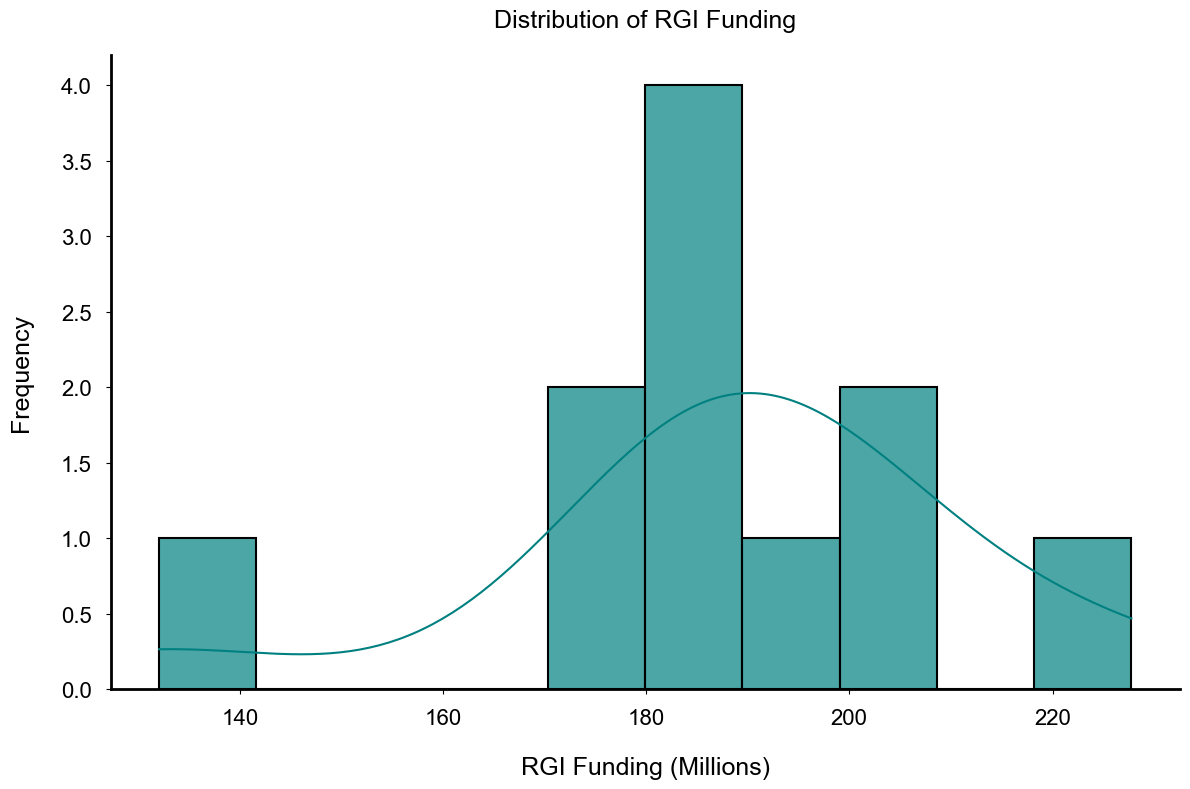

In [72]:
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

rgi_funding_data = rgi_non_rgi_df[rgi_non_rgi_df['Year'].between(2011, 2021)]

rgi_funding_data['RGI (Millions)'] = rgi_funding_data['RGI'] / 1_000_000

fig, ax = plt.subplots(figsize=(12, 8))

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

sns.histplot(
    rgi_funding_data['RGI (Millions)'], 
    bins=10, 
    kde=True,
    color='#008080',
    edgecolor='black', 
    linewidth=1.5, 
    alpha=0.7, 
    ax=ax
)

plt.title('Distribution of RGI Funding', fontsize=18, pad=20)
plt.xlabel('RGI Funding (Millions)', fontsize=18, labelpad=20)
plt.ylabel('Frequency', fontsize=18, labelpad=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

def millions_formatter(x, pos):
    return f'{int(x)}'

ax.xaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))

ax.grid(False)

for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(spine in ['bottom', 'left'])
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(2)

ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)

plt.tight_layout()

plt.show()


In [73]:
filtered_data = housing_data_page_3

filtered_data['RGI'] = filtered_data['Ongoing Funding'] * (filtered_data['Percentage'] / 100)

filtered_data['Private RGI'] = filtered_data.apply(
    lambda row: row['RGI'] if row['Funding Type'] == 'Private' else 0, axis=1
)

filtered_data['Public RGI'] = filtered_data.apply(
    lambda row: row['RGI'] if row['Funding Type'] == 'Public' else 0, axis=1
)

new_df_rgi = filtered_data[['Year', 'Private RGI', 'Public RGI']]

new_df_rgi_grouped = new_df_rgi.groupby('Year').sum().reset_index()

new_df_rgi_grouped


,Year,Private RGI,Public RGI
0,2011,"28,019,756.68210","148,218,140.57002"
1,2012,"30,865,567.65109","174,319,930.10276"
2,2013,"32,277,164.80887","172,365,138.53633"
3,2014,"31,409,409.90973","157,501,374.87024"
4,2015,"32,148,062.81754","148,521,811.35973"
5,2016,"32,384,132.44372","146,845,403.43211"
6,2017,"34,486,442.13600","152,829,192.78700"
7,2018,"34,229,092.96000","162,188,406.33100"
8,2019,"33,783,530.76200","154,383,448.66700"
9,2020,"22,192,516.67700","109,875,405.45600"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


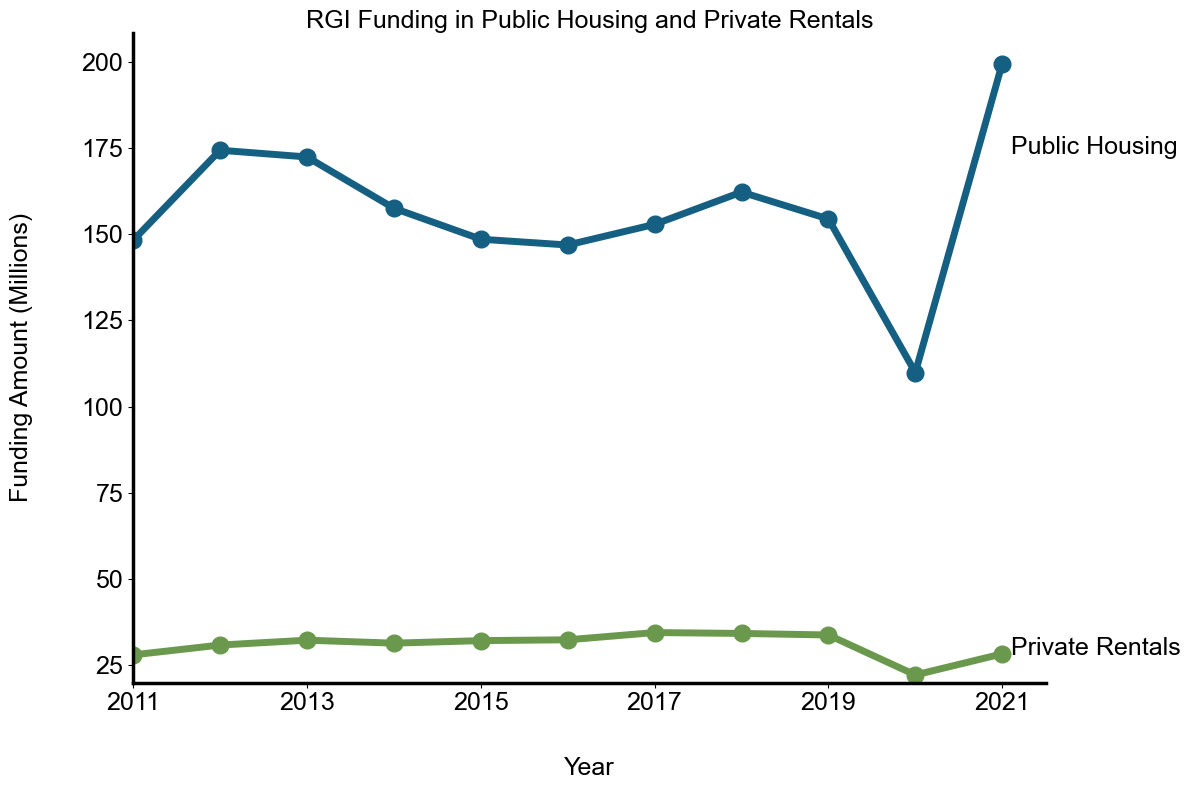

In [74]:
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

fig, ax = plt.subplots(figsize=(12, 8))  # Adjust size for better visibility

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.plot(new_df_rgi_grouped['Year'], new_df_rgi_grouped['Private RGI'], 
        color='#6a994e', marker='o', linestyle='-', linewidth=5, markersize=12)
ax.plot(new_df_rgi_grouped['Year'], new_df_rgi_grouped['Public RGI'], 
        color='#155f82', marker='o', linestyle='-', linewidth=5, markersize=12)

plt.xlabel('Year', fontsize=18, labelpad=30, verticalalignment='top')
plt.ylabel('Funding Amount (Millions)', fontsize=18, labelpad=35, horizontalalignment='center')
plt.title('RGI Funding in Public Housing and Private Rentals', fontsize=18, pad=0)

plt.xticks(ticks=[2011, 2013, 2015, 2017, 2019, 2021],
           labels=[2011, 2013, 2015, 2017, 2019, 2021],
           fontsize=18)

plt.xlim(2011, 2021.5)

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'

ax.yaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))
plt.yticks(fontsize=18)

plt.legend().remove()

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

ax.set_ylim(bottom=max(0, new_df_rgi_grouped[['Private RGI', 'Public RGI']].values.min() * 0.9))

ax.text(2021.1, 175000000, "Public Housing", fontsize=18, ha='left', va='center', color='black')  # Adjust Y value for placement
ax.text(2021.1, 30000000, "Private Rentals", fontsize=18, ha='left', va='center', color='black')  # Adjust Y value for placement

plt.tight_layout()

plt.show()


In [75]:

heatmap_RGI = housing_data_page_3.groupby(['Year', 'City'], as_index=False).agg({'RGI Funds': 'sum'})

heatmap_RGI.rename(columns={'RGI Funds': 'RGI Funding'}, inplace=True)

print(heatmap_RGI)


     Year            City      RGI Funding
0    2011    Chatham-Kent  7,498,229.24760
1    2011        Cornwall  6,558,567.23580
2    2011        Kingston 10,363,844.58790
3    2011          London 25,181,137.20650
4    2011  Northumberland  5,128,683.07344
..    ...             ...              ...
98   2021  Northumberland  6,189,390.33300
99   2021          Ottawa 74,299,140.60400
100  2021    Peterborough  9,930,047.57400
101  2021          Simcoe 14,717,696.30200
102  2021            York 32,206,089.21400

[103 rows x 3 columns]


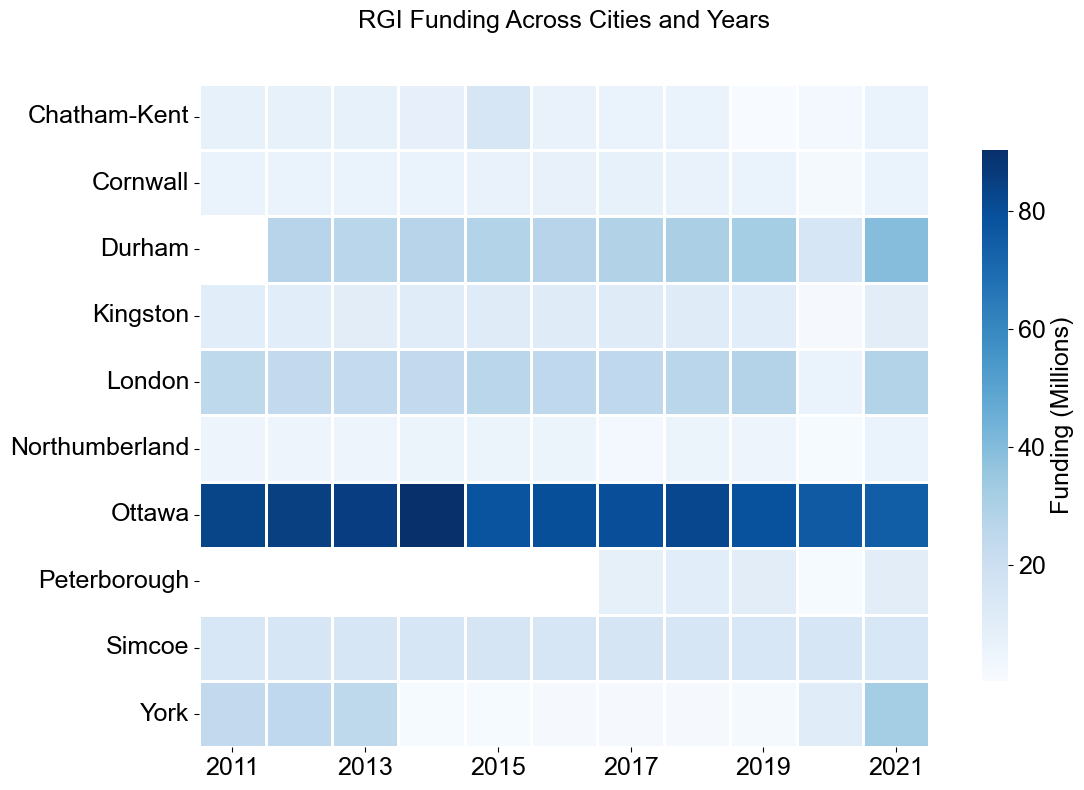

In [76]:

heatmap_data = heatmap_RGI.pivot(index='City', columns='Year', values='RGI Funding')

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

fig, ax = plt.subplots(figsize=(12, 8))

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

cmap = plt.cm.Blues

heatmap = sns.heatmap(heatmap_data, 
                      ax=ax,
                      annot=False,
                      cmap=cmap,
                      linewidths=1,
                      linecolor='white',
                      square=True,  # Square cells
                      cbar_kws={'label': 'Funding', 'shrink': 0.8})  # Adjust shrink to fit color bar

plt.title('RGI Funding Across Cities and Years', fontsize=18, pad=40)
plt.xlabel('', fontsize=18, labelpad=30)
plt.ylabel('', fontsize=18, labelpad=35)

x_ticks = heatmap_data.columns
plt.xticks(np.arange(len(x_ticks))[::2] + 0.5, x_ticks[::2], fontsize=18, rotation=0)

plt.yticks(np.arange(len(heatmap_data.index)) + 0.5, heatmap_data.index, fontsize=18, rotation=0)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Funding (Millions)', fontsize=18)

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'

cbar_ticks_formatter = FuncFormatter(millions_formatter)
cbar.ax.yaxis.set_major_formatter(cbar_ticks_formatter)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()


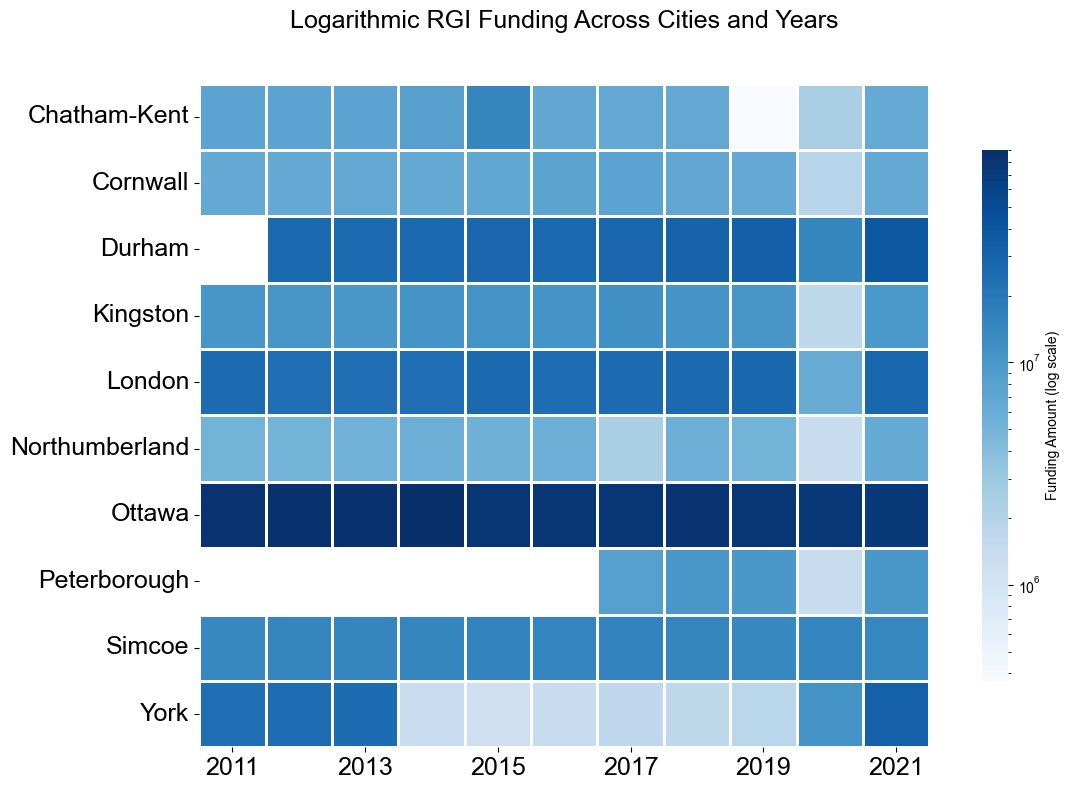

In [77]:

heatmap_data = heatmap_RGI.pivot(index='City', columns='Year', values='RGI Funding')

fig, ax = plt.subplots(figsize=(12, 8))

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

norm = mcolors.LogNorm(vmin=heatmap_data.min().min() + 1, vmax=heatmap_data.max().max())

cmap = plt.cm.Blues

sns.heatmap(heatmap_data, 
            ax=ax,
            annot=False,  # No annotations
            cmap=cmap,
            linewidths=1,  # White lines between cells
            linecolor='white',
            square=True,  # Square cells
            norm=norm,  # Apply logarithmic normalization
            cbar_kws={'label': 'Funding Amount (log scale)', 'shrink': 0.8})

plt.title('Logarithmic RGI Funding Across Cities and Years', fontsize=18, pad=40)
plt.xlabel('', fontsize=18, labelpad=30)
plt.ylabel('', fontsize=18, labelpad=35)

x_ticks = heatmap_data.columns
plt.xticks(np.arange(len(x_ticks))[::2] + 0.5, x_ticks[::2], fontsize=18, rotation=0)

plt.yticks(np.arange(len(heatmap_data.index)) + 0.5, heatmap_data.index, fontsize=18, rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()


## Without 2020 peak and Peterborough but with Durham

In [78]:
filtered_df = housing_data_page_3[(housing_data_page_3['City'] != 'Peterborough') &
                                   (housing_data_page_3['Year'] >= 2011) & 
                                   (housing_data_page_3['Year'] <= 2019)]

filtered_df.head()


,Year,City,Name,Number,One Time Funding,Ongoing Funding,Total,Percentage,Funding Type,RGI Funds,Non-RGI Funds,RGI,Non RGI,Private RGI,Public RGI
0,2011,Chatham-Kent,Public housing,411,"453,810.00000","3,830,940.00000","4,284,750.00000",90.69000,Public,"3,474,279.48600","356,660.51400","3,474,279.48600","356,660.51400",0.00000,"3,474,279.48600"
1,2011,Chatham-Kent,Rent supplement,412,"35,678.00000","502,974.00000","538,652.00000",100.00000,Private,"502,974.00000",0.00000,"502,974.00000",0.00000,"502,974.00000",0.00000
2,2011,Chatham-Kent,Limited dividend,413,0.00000,0.00000,0.00000,0.00000,Private,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,2011,Chatham-Kent,Section 26,414,0.00000,0.00000,0.00000,0.00000,Private,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,2011,Chatham-Kent,Section 27,415,0.00000,0.00000,0.00000,0.00000,Private,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [79]:
filtered_df.describe()

,Year,Number,One Time Funding,Ongoing Funding,Total,Percentage,RGI Funds,Non-RGI Funds,RGI,Non RGI,Private RGI,Public RGI
count,880.00000,880.00000,880.00000,880.00000,880.00000,880.00000,880.00000,880.00000,880.00000,880.00000,880.00000,880.00000
mean,"2,015.05000",416.10682,"160,042.51784","5,144,533.65001","5,304,625.16473",32.12619,"1,916,201.71432","3,228,331.93569","1,916,201.71432","3,228,331.93569","325,038.92166","1,582,114.83089"
std,2.56026,8.61593,"552,483.63134","12,990,494.59756","13,386,374.53558",40.94127,"5,464,984.49194","11,630,446.58427","5,464,984.49194","11,630,446.58427","1,963,596.42142","5,196,395.06749"
min,"2,011.00000",188.00000,0.00000,-128.00000,-128.00000,0.00000,-57.08800,-70.91200,-57.08800,-70.91200,-57.08800,0.00000
25%,"2,013.00000",413.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,"2,015.00000",416.00000,0.00000,"37,092.52000","53,922.08500",0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,"2,017.00000",419.00000,0.00000,"3,257,181.00000","3,270,625.75000",76.38000,"1,210,555.81250","217,846.39475","1,210,555.81250","217,846.39475",0.00000,"26,805.55063"
max,"2,019.00000",425.00000,"4,391,395.29000","102,981,191.15000","105,225,876.20000",100.00000,"39,952,005.81741","102,981,191.15000","39,952,005.81741","102,981,191.15000","19,775,182.00000","39,952,005.81741"


In [80]:
filtered_df = housing_data_page_3[(housing_data_page_3['City'] != 'Peterborough') & 
                                   (housing_data_page_3['Year'] >= 2011) & 
                                   (housing_data_page_3['Year'] <= 2019)]

filtered_rgi_non_df = filtered_df.groupby('Year', as_index=False).agg({
    'RGI Funds': 'sum',
    'Non-RGI Funds': 'sum'
})

filtered_rgi_non_df.head()


,Year,RGI Funds,Non-RGI Funds
0,2011,"176,237,897.25213","251,928,867.79787"
1,2012,"205,185,497.75385","305,968,431.68615"
2,2013,"204,642,303.34520","304,087,835.53480"
3,2014,"188,910,784.77997","334,466,562.38003"
4,2015,"188,632,080.54046","314,861,053.69954"


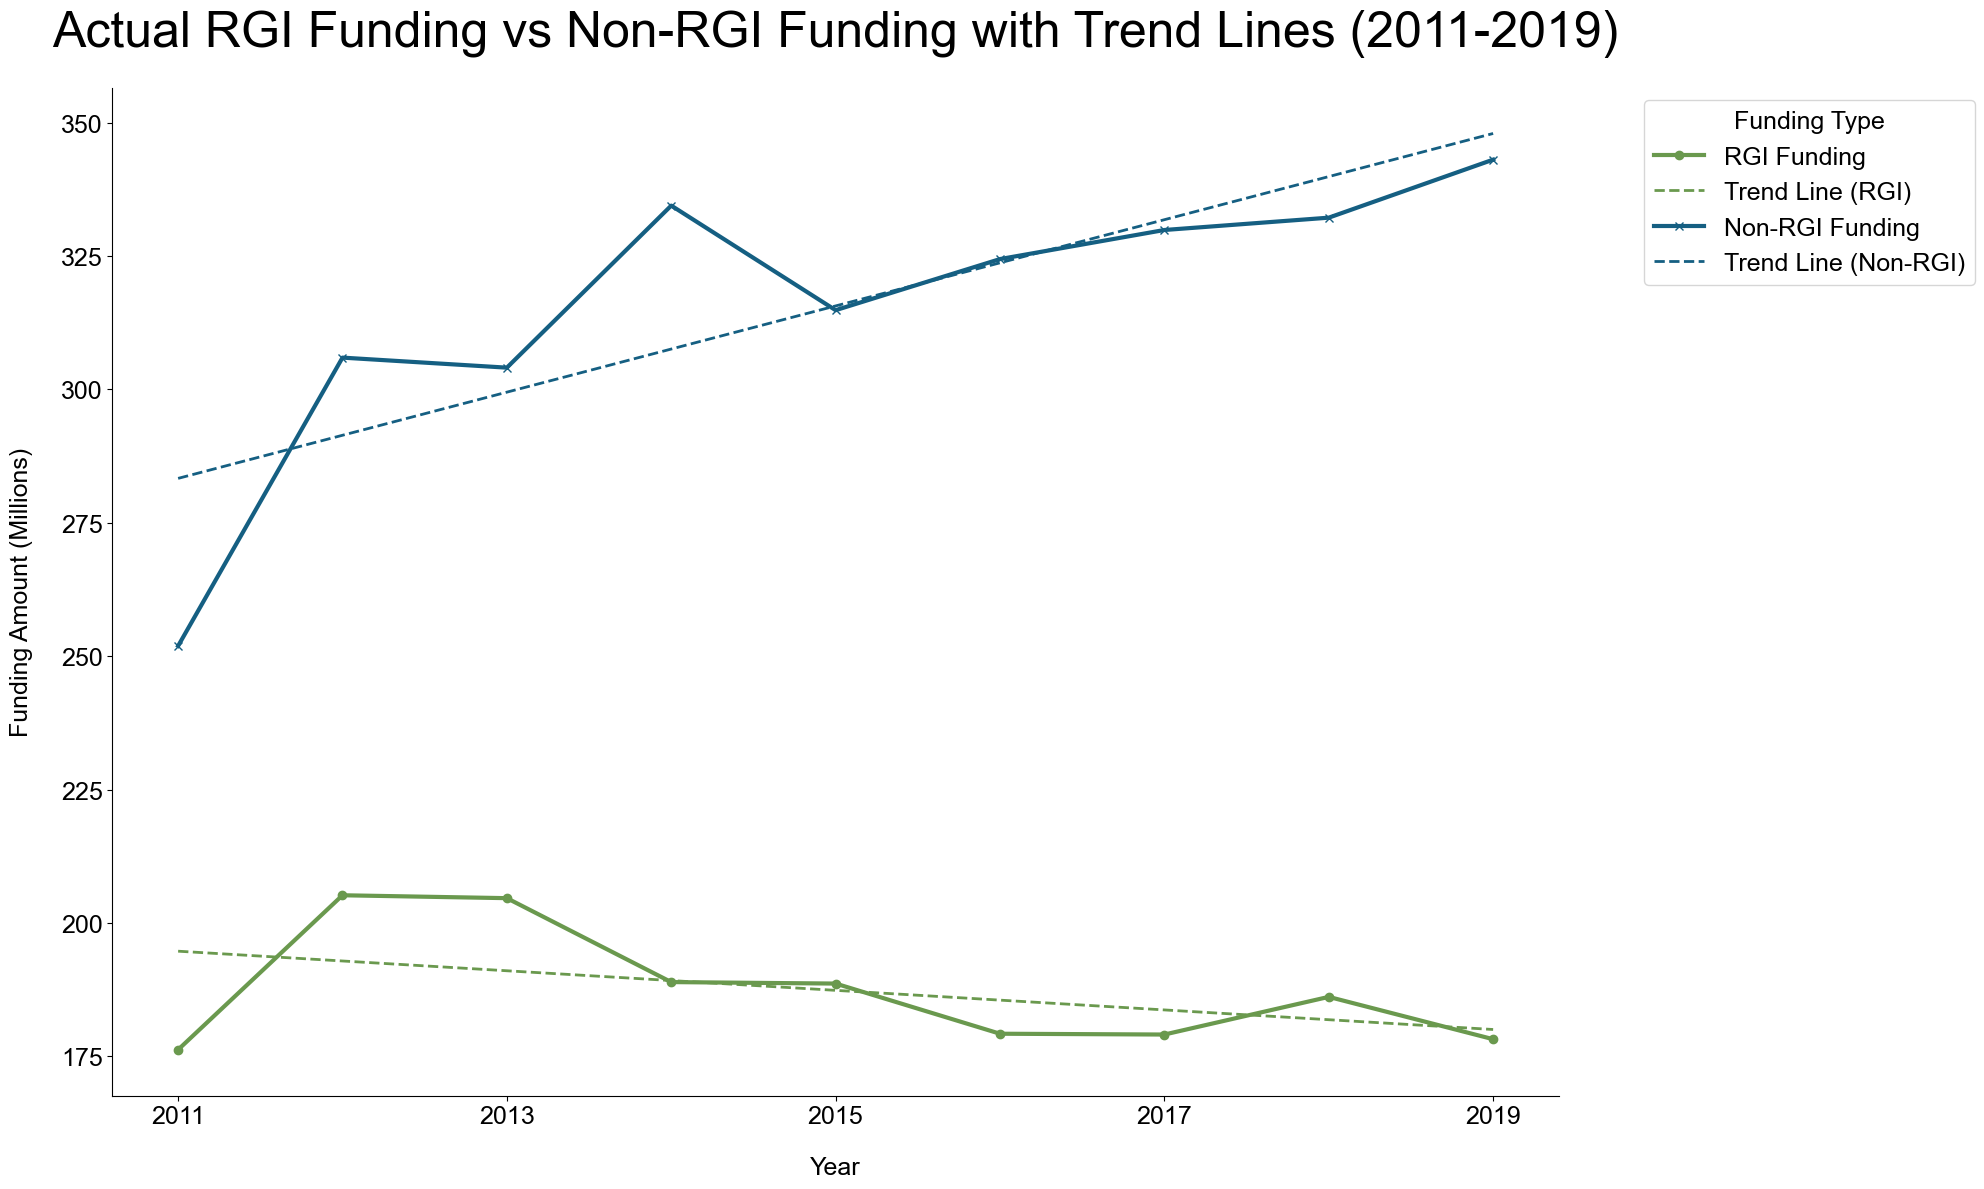

In [81]:
years = filtered_rgi_non_df['Year']
rgi_funding = filtered_rgi_non_df['RGI Funds']
non_rgi_funding = filtered_rgi_non_df['Non-RGI Funds']

slope_rgi, intercept_rgi, _, _, _ = linregress(years, rgi_funding)
slope_non_rgi, intercept_non_rgi, _, _, _ = linregress(years, non_rgi_funding)

rgi_trend = slope_rgi * years + intercept_rgi
non_rgi_trend = slope_non_rgi * years + intercept_non_rgi

fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(years, rgi_funding, label='RGI Funding', color='#6a994e', marker='o', linewidth=3)
ax.plot(years, rgi_trend, label='Trend Line (RGI)', color='#6a994e', linestyle='--', linewidth=2)

ax.plot(years, non_rgi_funding, label='Non-RGI Funding', color='#155f82', marker='x', linewidth=3)
ax.plot(years, non_rgi_trend, label='Trend Line (Non-RGI)', color='#155f82', linestyle='--', linewidth=2)

plt.xlabel('Year', fontsize=18, labelpad=20)
plt.ylabel('Funding Amount (Millions)', fontsize=18, labelpad=20)
plt.title('Actual RGI Funding vs Non-RGI Funding with Trend Lines (2011-2019)', fontsize=36, pad=30)

plt.xticks(ticks=years[::2], labels=years[::2], fontsize=18)

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}'

ax.yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))
plt.yticks(fontsize=18)

plt.legend(
    title='Funding Type',
    fontsize=18,
    title_fontsize=18,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()


In [82]:

rgi_funding = filtered_rgi_non_df['RGI Funds']
non_rgi_funding = filtered_rgi_non_df['Non-RGI Funds']

# Perform Spearman's rank correlation test
corr_coefficient, p_value = spearmanr(rgi_funding, non_rgi_funding)

# Output the results
print(f"Spearman's rank correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant monotonic correlation between RGI Funding and Non RGI Funding.")
else:
    print("Fail to reject the null hypothesis: There is no significant monotonic correlation between RGI Funding and Non RGI Funding.")


Spearman's rank correlation coefficient: -0.16666666666666669
P-value: 0.668231040071504
Fail to reject the null hypothesis: There is no significant monotonic correlation between RGI Funding and Non RGI Funding.


In [83]:

funding_df = filtered_df.groupby(['Year', 'Funding Type'])['Ongoing Funding'].sum().reset_index()

pivot_df = funding_df.pivot(index='Year', columns='Funding Type', values='Ongoing Funding').reset_index()

pivot_df.columns.name = None  # Remove the columns' name (Funding Type)
pivot_df.rename(columns={'Private': 'Private Funding', 'Public': 'Public Funding'}, inplace=True)

pivot_df


,Year,Private Funding,Public Funding
0,2011,"28,897,705.44000","184,988,284.46000"
1,2012,"31,933,135.72000","223,943,829.00000"
2,2013,"33,210,613.35000","221,236,195.89000"
3,2014,"32,276,927.72000","229,419,530.26000"
4,2015,"32,831,600.89000","218,725,353.40000"
5,2016,"33,171,714.80000","218,664,894.88000"
6,2017,"33,967,595.00000","220,517,926.00000"
7,2018,"33,431,285.00000","225,739,256.00000"
8,2019,"32,899,390.00000","227,742,888.00000"


In [84]:
private_funding = pivot_df['Private Funding']
public_funding = pivot_df['Public Funding']

corr_coefficient, p_value = spearmanr(private_funding, public_funding)

print(f"Spearman's rank correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant monotonic correlation between Private Funding and Public Funding.")
else:
    print("Fail to reject the null hypothesis: There is no significant monotonic correlation between Private Funding and Public Funding.")


Spearman's rank correlation coefficient: 0.09999999999999999
P-value: 0.797971695234851
Fail to reject the null hypothesis: There is no significant monotonic correlation between Private Funding and Public Funding.


In [85]:

rgi_funds_df = filtered_df.groupby(['Year', 'Funding Type'])['RGI Funds'].sum().reset_index()

rgi_pivot_df = rgi_funds_df.pivot(index='Year', columns='Funding Type', values='RGI Funds').reset_index()

rgi_pivot_df.columns.name = None  # Remove the columns' name (Funding Type)
rgi_pivot_df.rename(columns={'Private': 'Private RGI', 'Public': 'Public RGI'}, inplace=True)

rgi_pivot_df.head()


,Year,Private RGI,Public RGI
0,2011,"28,019,756.68210","148,218,140.57002"
1,2012,"30,865,567.65109","174,319,930.10276"
2,2013,"32,277,164.80887","172,365,138.53633"
3,2014,"31,409,409.90973","157,501,374.87024"
4,2015,"32,148,062.81754","148,521,811.35973"


In [86]:

private_rgi = rgi_pivot_df['Private RGI']
public_rgi = rgi_pivot_df['Public RGI']

corr_coefficient, p_value = spearmanr(private_rgi, public_rgi)

print(f"Spearman's rank correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant monotonic correlation between Private RGI and Public RGI.")
else:
    print("Fail to reject the null hypothesis: There is no significant monotonic correlation between Private RGI and Public RGI.")


Spearman's rank correlation coefficient: -0.5166666666666667
P-value: 0.1543901209862251
Fail to reject the null hypothesis: There is no significant monotonic correlation between Private RGI and Public RGI.


## Page 4

In [87]:
housing_data_page_4_part1.head()

housing_data_page_4_part1[['RGI', 'Non-RGI', 'Vacant Units']] = housing_data_page_4_part1[['RGI', 'Non-RGI', 'Vacant Units']].fillna(0)

print(housing_data_page_4_part1.head())


   Year          City              Name       RGI  Non-RGI  Vacant Units
0  2011  Chatham-Kent    Public housing 602.00000 62.00000      31.00000
1  2011  Chatham-Kent   Rent supplement 122.00000  8.00000       2.00000
2  2011  Chatham-Kent  Limited dividend   0.00000  0.00000       0.00000
3  2011  Chatham-Kent        Section 26   0.00000  0.00000       0.00000
4  2011  Chatham-Kent        Section 27   0.00000  0.00000       0.00000


In [88]:
housing_data_page_4_part1.describe()

,Year,RGI,Non-RGI,Vacant Units
count,"1,080.00000","1,080.00000","1,080.00000","1,080.00000"
mean,"2,016.26852",399.96852,98.36852,11.89074
std,3.34211,"1,081.34437",274.85698,39.55879
min,"2,010.00000",0.00000,0.00000,0.00000
25%,"2,013.00000",0.00000,0.00000,0.00000
50%,"2,016.00000",0.00000,0.00000,0.00000
75%,"2,019.00000",242.25000,32.25000,5.00000
max,"2,023.00000","8,040.00000","2,312.00000",748.00000


In [89]:

graph_units = housing_data_page_4_part1.groupby(['Year', 'City'])[['RGI', 'Non-RGI', 'Vacant Units']].sum().reset_index()

graph_units = graph_units[(graph_units['Year'] >= 2011) & (graph_units['Year'] <= 2021)]

graph_units.head()

,Year,City,RGI,Non-RGI,Vacant Units
1,2011,Chatham-Kent,"1,266.00000",261.00000,62.00000
2,2011,Cornwall,"1,729.00000",171.00000,62.00000
3,2011,Durham,"4,378.00000","2,104.00000",44.00000
4,2011,Kingston,"1,943.00000",232.00000,35.00000
5,2011,London,"5,724.00000","1,392.00000",240.00000


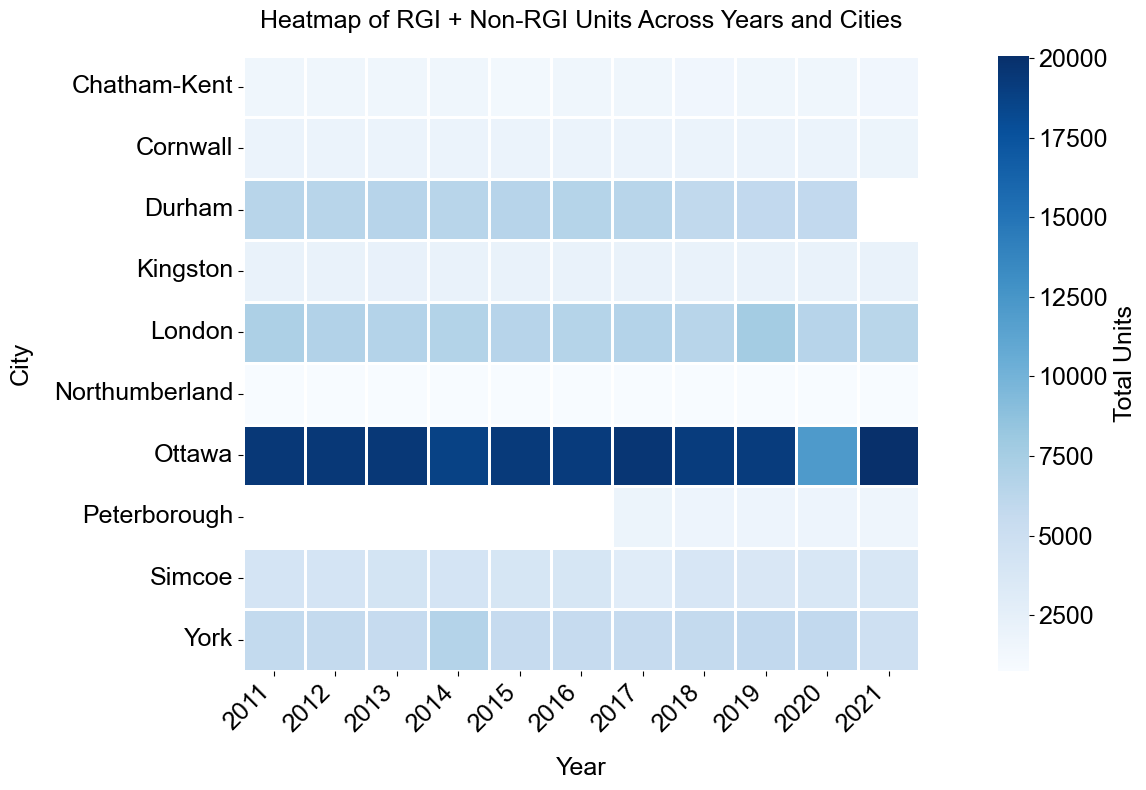

In [90]:

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

graph_units['Total Units'] = graph_units['RGI'] + graph_units['Non-RGI']

heatmap_data = graph_units.pivot(index='City', columns='Year', values='Total Units')

plt.figure(figsize=(16, 8))  # Adjust figure size

plt.gcf().patch.set_facecolor('white')
plt.gca().set_facecolor('white')

cmap = plt.cm.Blues

ax = sns.heatmap(
    heatmap_data,
    annot=False,  # No annotations
    cmap=cmap,  # Using the blue color map
    linewidths=1,  # White lines between cells
    linecolor='white',
    square=True,  # Force square blocks
    cbar_kws={'label': 'Total Units'},  # Adjust color bar label
)

plt.yticks(rotation=0, fontsize=18)  # Keep city names horizontal
plt.xticks(rotation=45, ha='right', fontsize=18)  # Rotate year labels

plt.title("Heatmap of RGI + Non-RGI Units Across Years and Cities", fontsize=18, pad=20)
plt.xlabel("Year", fontsize=18, labelpad=15)
plt.ylabel("City", fontsize=18, labelpad=15)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)  # Increase tick label size on the color bar
cbar.set_label('Total Units', fontsize=18)  # Adjust the color bar label

plt.tight_layout()

plt.show()


In [91]:

aggregated_df = housing_data_page_4_part1.groupby('Year')[['RGI', 'Non-RGI', 'Vacant Units']].sum().reset_index()


aggregated_df = aggregated_df[aggregated_df['Year'].between(2011, 2021)]
aggregated_df


,Year,RGI,Non-RGI,Vacant Units
1,2011,"39,340.00000","10,002.00000",881.00000
2,2012,"39,349.00000","9,686.00000",850.00000
3,2013,"39,312.00000","9,600.00000",937.00000
4,2014,"39,020.00000","10,302.00000","1,674.00000"
5,2015,"39,239.00000","8,851.00000","1,058.00000"
6,2016,"39,030.00000","9,456.00000",918.00000
7,2017,"39,978.00000","9,613.00000","1,057.00000"
8,2018,"40,209.00000","9,033.00000","1,265.00000"
9,2019,"40,713.00000","9,750.00000","1,306.00000"
10,2020,"32,399.00000","10,000.00000","1,228.00000"


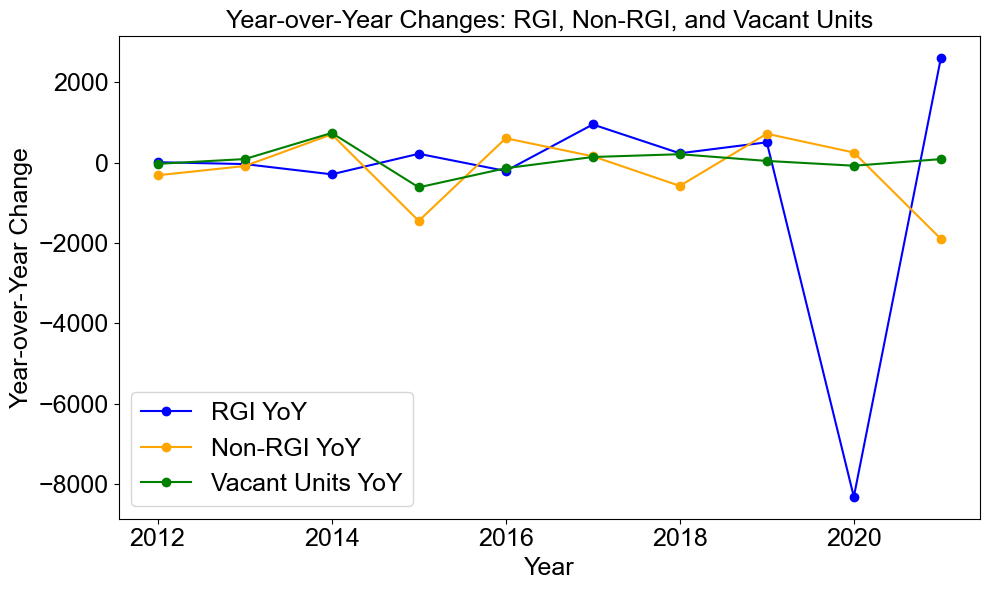

In [92]:

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

rgi_yoy = aggregated_df['RGI'].diff().dropna()  # Year-over-Year change for RGI
non_rgi_yoy = aggregated_df['Non-RGI'].diff().dropna()  # Year-over-Year change for Non-RGI
vacant_yoy = aggregated_df['Vacant Units'].diff().dropna()  # Year-over-Year change for Vacant Units

years = aggregated_df['Year'].iloc[1:]  # Exclude the first year since it will have NaN after diff

plt.figure(figsize=(10, 6))
plt.plot(years, rgi_yoy, label='RGI YoY', marker='o', color='blue')
plt.plot(years, non_rgi_yoy, label='Non-RGI YoY', marker='o', color='orange')
plt.plot(years, vacant_yoy, label='Vacant Units YoY', marker='o', color='green')

plt.xlabel('Year', fontsize=18)
plt.ylabel('Year-over-Year Change', fontsize=18)
plt.title('Year-over-Year Changes: RGI, Non-RGI, and Vacant Units', fontsize=18)
plt.legend(fontsize=18)

plt.gcf().patch.set_facecolor('white')
plt.gca().set_facecolor('white')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()


## CWL

In [93]:
CWL.head()

,Year,City,No dependants,Dependants,Seniors
0,2011,Chatham-Kent,134.00000,131.00000,106.00000
1,2011,Cornwall,243.00000,238.00000,299.00000
2,2011,Durham,NaN,NaN,NaN
3,2011,Kingston,750.00000,384.00000,75.00000
4,2011,London,"2,371.00000","1,274.00000",271.00000


In [94]:

CWL['No dependants'] = pd.to_numeric(CWL['No dependants'], errors='coerce')
CWL['Dependants'] = pd.to_numeric(CWL['Dependants'], errors='coerce')
CWL['Seniors'] = pd.to_numeric(CWL['Seniors'], errors='coerce')

CWL['No dependants'] = CWL['No dependants'].fillna(0)
CWL['Dependants'] = CWL['Dependants'].fillna(0)
CWL['Seniors'] = CWL['Seniors'].fillna(0)

CWL['Total'] = CWL['No dependants'] + CWL['Dependants'] + CWL['Seniors']

CWL.head()


,Year,City,No dependants,Dependants,Seniors,Total
0,2011,Chatham-Kent,134.00000,131.00000,106.00000,371.00000
1,2011,Cornwall,243.00000,238.00000,299.00000,780.00000
2,2011,Durham,0.00000,0.00000,0.00000,0.00000
3,2011,Kingston,750.00000,384.00000,75.00000,"1,209.00000"
4,2011,London,"2,371.00000","1,274.00000",271.00000,"3,916.00000"


In [95]:
CWL.describe()

,Year,No dependants,Dependants,Seniors,Total
count,90.00000,90.00000,90.00000,90.00000,90.00000
mean,"2,015.00000","1,388.55556","1,224.86667","1,241.41111","3,854.83333"
std,2.59645,"1,414.77335","1,389.10681","2,071.05889","4,437.61111"
min,"2,011.00000",0.00000,0.00000,0.00000,0.00000
25%,"2,013.00000",242.25000,160.75000,124.00000,651.25000
50%,"2,015.00000",774.00000,377.50000,272.00000,"1,536.50000"
75%,"2,017.00000","1,999.75000","2,392.25000","1,423.75000","5,671.50000"
max,"2,019.00000","5,332.00000","4,457.00000","8,957.00000","17,457.00000"


C:\Users\combax\AppData\Local\Temp\ipykernel_11220\808797034.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)


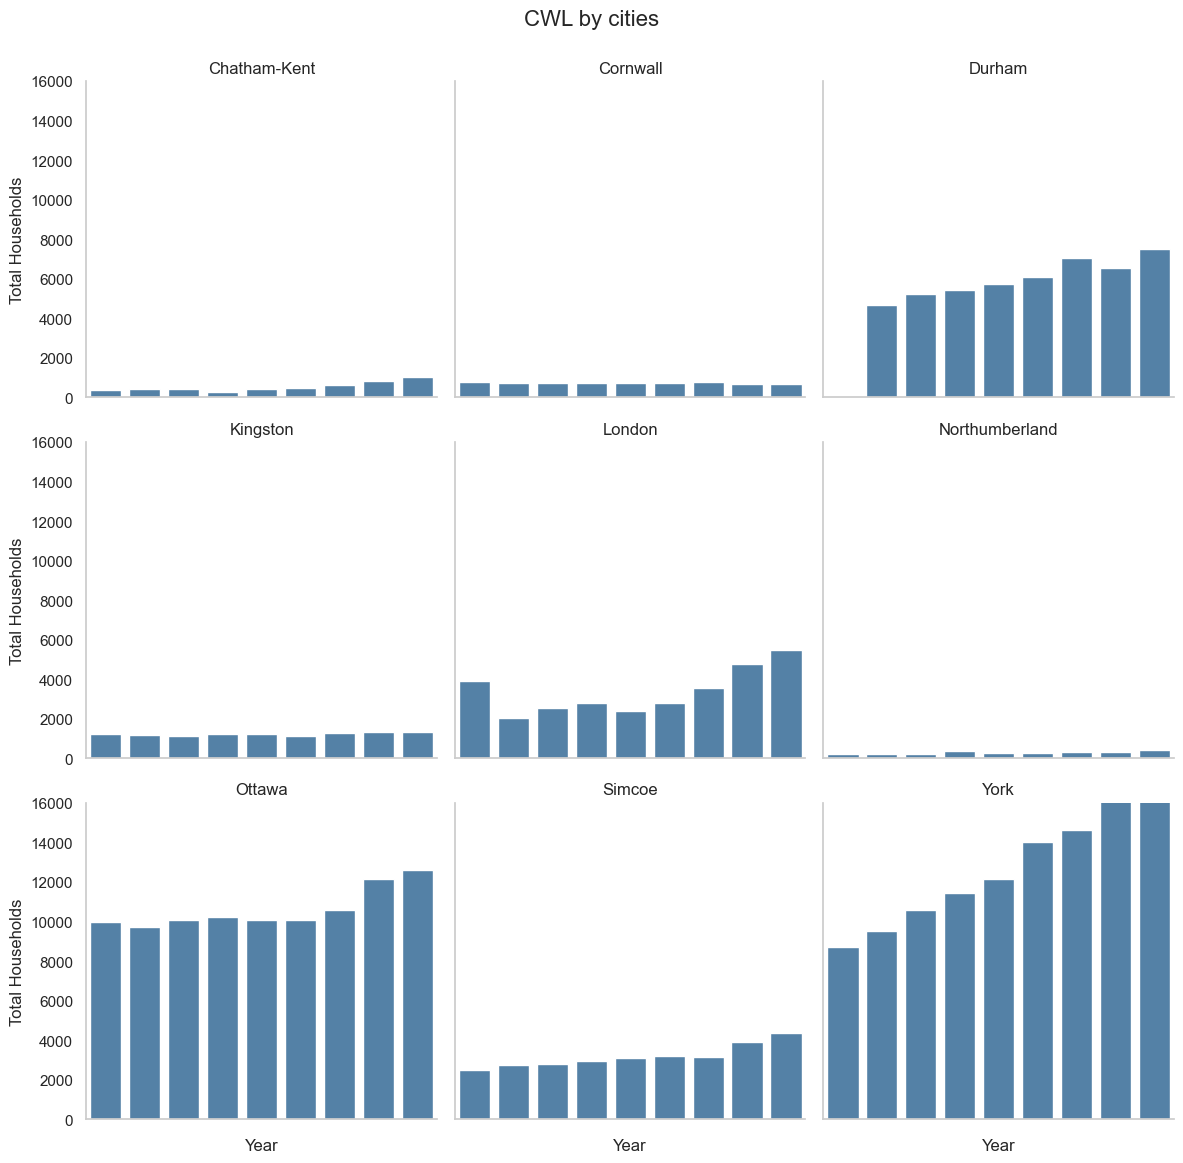

In [96]:
CWL_filtered = CWL[CWL['City'] != 'Peterborough']

CWL_long = CWL_filtered.melt(id_vars=['Year', 'City'], value_vars=['Total'], var_name='Metric', value_name='Value')

sns.set_theme(style="whitegrid")

g = sns.FacetGrid(
    CWL_long, 
    col="City", 
    col_wrap=3,  # Number of subplots per row
    height=4,    # Height of each subplot
    sharey=True  # Share the Y-axis across all subplots
)

g.map(sns.barplot, "Year", "Value", order=sorted(CWL['Year'].unique()), color="steelblue")

for ax in g.axes.flat:
    ax.grid(False)

g.set_titles("{col_name}")  # Use city names as subplot titles
g.set_axis_labels("Year", "Total Households")  # Common axis labels
g.set(ylim=(0, 16000))  # Set the Y-axis range for all subplots

g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("CWL by cities", fontsize=16)  # Main title

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)

# Show the plot
plt.show()


In [97]:

CWL_yearly = CWL.groupby('Year')[['No dependants', 'Dependants', 'Seniors', 'Total']].sum()

CWL_yearly = CWL_yearly.reset_index()

print(CWL_yearly)

   Year  No dependants   Dependants      Seniors        Total
0  2011   10,817.00000  9,152.00000  7,682.00000 27,651.00000
1  2012   11,592.00000 10,510.00000  9,079.00000 31,181.00000
2  2013   11,863.00000 11,012.00000 10,857.00000 33,732.00000
3  2014   12,519.00000 11,253.00000 11,635.00000 35,407.00000
4  2015   12,127.00000 11,391.00000 12,584.00000 36,102.00000
5  2016   13,355.00000 11,618.00000 13,774.00000 38,747.00000
6  2017   16,022.00000 13,413.00000 14,155.00000 43,590.00000
7  2018   17,618.00000 14,986.00000 15,722.00000 48,326.00000
8  2019   19,057.00000 16,903.00000 16,239.00000 52,199.00000


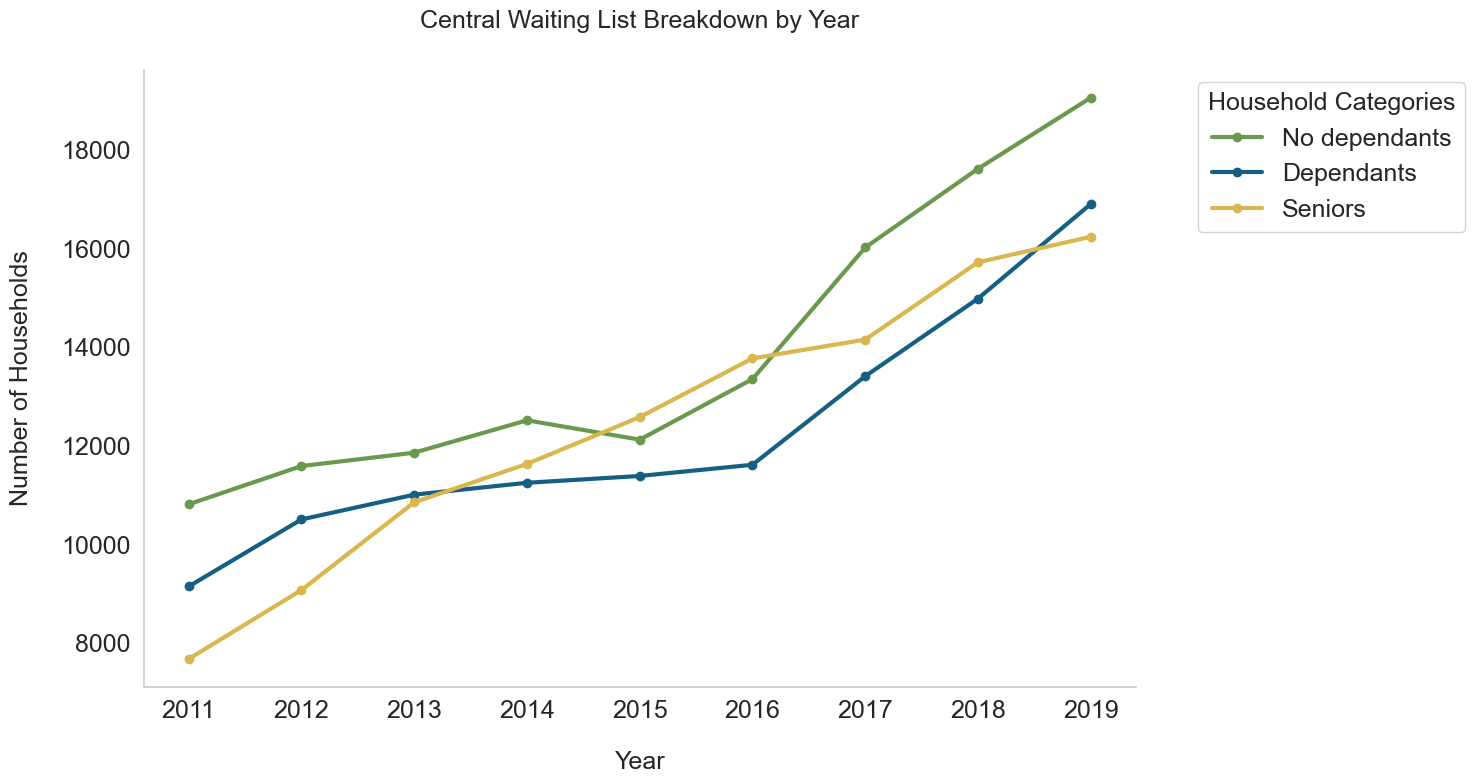

In [98]:

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
})

fig, ax = plt.subplots(figsize=(15, 8))

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.plot(CWL_yearly['Year'], CWL_yearly['No dependants'], label='No dependants', marker='o', linestyle='-', color='#6a994e', linewidth=3)
ax.plot(CWL_yearly['Year'], CWL_yearly['Dependants'], label='Dependants', marker='o', linestyle='-', color='#155f82', linewidth=3)
ax.plot(CWL_yearly['Year'], CWL_yearly['Seniors'], label='Seniors', marker='o', linestyle='-', color='#d9b74e', linewidth=3)

plt.title('Central Waiting List Breakdown by Year', fontsize=18, pad=30)
plt.xlabel('Year', fontsize=18, labelpad=20)
plt.ylabel('Number of Households', fontsize=18, labelpad=20)

plt.xticks(CWL_yearly['Year'], fontsize=18)

plt.legend(
    title='Household Categories',
    fontsize=18,
    title_fontsize=18,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.yticks(fontsize=18)

plt.tight_layout()

# Show the plot
plt.show()
